# Hands-on 5

### CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###

Please complete the following tasks per instructions provided. Please submit this notebook (filename: handson5-**firstname**-**lastname**.ipynb) to D2L by 11:30 am, March, 28. 
</br>
</br>



NOTES ABOUT PLAGIARISM:
Please note that the hands-ons are meant to be done individually. Any submission that appears to be in violation of an academic offence (plagiarism) may be reported to the Registrar’s Office as per UNB regulations.


 **Q1** For this handson you will first analyze a dataset that contains nutrition information about many common food items.

Q1.1) Download the data file *food_nutrition.csv* from D2L, and then load the data  into a dataframe. This dataset contains  nutrition information about different food items.

Also download the codendata.zip by running the commands below in a Terminal shell (on Linux) or clicking the link (on Windows):
wget www.cs.unb.ca/~sray/teaching/datascience/codendata.zip 

After you unzip it, you will find several files related to our textbook code and NSFG dataset. Copy those files in the current folder. You will need these files for a few questions.
 
Q1.2)  For the food items that are dairy products i.e. their category names include the words BUTTER, CHEESE, MILK, YOGURT or DAIRY, show the item names of the top 10 food items based on calcium content.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2 
import thinkplot 


# Q1.1: write your code below
#no code needed

# Q1.2: write your code below
foodNutritionDF = pd.read_csv("food_nutrition.csv", delimiter=',')

filteredDF1 = pd.DataFrame(foodNutritionDF)
filteredDF1 = foodNutritionDF[foodNutritionDF['Category'].isin(['BUTTER', 'CHEESE', 'MILK', 'YOGURT', 'DIARY'])]
filteredDF1 = filteredDF1.nlargest(10, 'Calcium')
filteredDF1 = filteredDF1[['Item_Description','Calcium']]
filteredDF1

,Item_Description,Calcium
7327,"CHEESE,PARMESAN,LO NA",1376
83,"MILK,DRY,NONFAT,REG,WO/ VIT A",1257
142,"MILK,DRY,NONFAT,REG,W/ VIT A",1257
134,"CHEESE,PARMESAN,SHREDDED",1253
84,"MILK,DRY,NONFAT,INST,W/ VIT A",1231
143,"MILK,DRY,NONFAT,INST,WO/ VIT A",1231
32,"CHEESE,PARMESAN,HARD",1184
86,"MILK,BUTTERMILK,DRIED",1184
186,"CHEESE,MEXICAN,BLEND,RED FAT",1146
31,"CHEESE,PARMESAN,GRATED",1109


**Q2** 

Q2.1) For each category of food items, calculate the mean protein content (i.e. quantity). Then show only the name of those categories and their mean (i.e. average) protein content, whose mean protein content exceeds 15.

Q2.2) For the food items belonging to those categories whose mean protein content exceeds 15 (From Q2.1), plot a boxplot of the protein content of these food items. 

Q2.3) For the food items from Q2.2, what are the median (i.e. 50th percentile), 25th and 75th percentile of the protein content of these food items? You may use thinkstats2 library for this. Please refer to the letture notes to see how to use this. 

Q2.4) For the food items from Q2.2, is there any outlier?

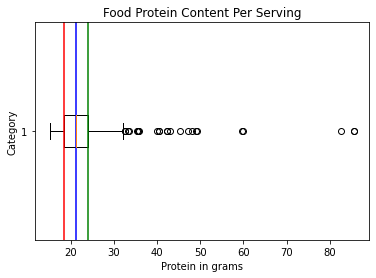

In [73]:
# write your code below

#Q2.1

filteredDF2 = pd.DataFrame(foodNutritionDF)
filteredDF2 = filteredDF2.groupby('Category')['Protein'].mean().reset_index()
filteredDF2 = filteredDF2.sort_values(by = 'Protein', ascending = False)
filteredDF2 = filteredDF2[filteredDF2['Protein'] > 15]


#Q2.2
plt.boxplot(filteredDF2['Protein'], vert = False)
plt.title('Food Protein Content Per Serving')
plt.xlabel('Protein in grams')
plt.ylabel('Category')
# plt.show()

# filteredDF2

#Q2.3
#thinkplot does not have a box plot
cdf = thinkstats2.Cdf(filteredDF2['Protein'])

percent25 = cdf.Percentile(25)
percent50 = cdf.Percentile(50)
percent75 = cdf.Percentile(75)

plt.axvline(percent25, color='red')
plt.axvline(percent50, color='blue')
plt.axvline(percent75, color='green')
plt.show()


#Q2.4
# every circle is an "outlier" but the biggest of the outliers are
# Soy Prot Isolate, Gelatins, and Seal

**Q3** 

Q3.1) Plot a histogram based on Kilocalories of the food items using thinkstats2 and thinkplot libraries. Please refer to the letture notes to see how to use these libraries.

Q3.2) Based on the histogram and additional code (for example, using boolean filter condition) identify the food items that are high in terms of Kilocalories. What kinds of food items are these?

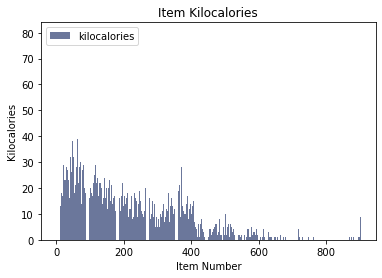

,index,Category,Item_Description,Kilocalories
0,536,No Category,LARD,902
1,535,FAT,"FAT,BEEF TALLOW",902
2,645,FISH OIL,"FISH OIL,SARDINE",902
3,644,FISH OIL,"FISH OIL,SALMON",902
4,643,FISH OIL,"FISH OIL,MENHADEN,FULLY HYDR",902
...,...,...,...,...
99,698,OIL,"OIL,INDUSTRIAL,PALM KERNEL (HYDROGENATED),FILL...",884
100,695,OIL,"OIL,VEG,INDUSTRIAL,PALM KERNEL (HYDROG) WHIPPE...",884
101,694,OIL,"OIL,INDUS,COCNT,CONFECTION FAT,ICE CRM COATINGS",884
102,693,OIL,"OIL,VEG,INDUS,PALM KERNEL (HYDROG),CONFECTION FAT",884


<Figure size 576x432 with 0 Axes>

In [118]:
# write your code here

#Q3.1
filteredDF3 = pd.DataFrame(foodNutritionDF)
filteredDF3 = filteredDF3[['Category','Item_Description','Kilocalories']]
filteredDF3 = filteredDF3.sort_values(by = 'Kilocalories', ascending = False).reset_index()
# filteredDF3

hist = thinkstats2.Hist(filteredDF3['Kilocalories'])
thinkplot.Hist(hist, label = "kilocalories")
thinkplot.Show(title = 'Item Kilocalories', ylabel = 'Kilocalories', xlabel='Item Number')

#Q3.2
top99Percent = filteredDF3['Kilocalories'].quantile(0.99)
top99Group = filteredDF3['Kilocalories'] >= top99Percent
filteredDF3[top99Group]

#these are Fat and Oils

**Q4** The purpose of this question is to familiarize you with the National Survey of Family Growth (NSFG) dataset used in the textbook.

Q4.1) Execute the code below and get yourself familiarize with the NSFG dataset that we discussed in the class.

Q4.2) After loading the NSFG dataset, plot a boxplot  of the birth weights for live births. The corresponding column in the data frame is called *birthwgt_lb*.


In [1]:
import nsfg

nsfg_df = nsfg.ReadFemPreg()

nsfg_df.head(5)

# Q4.1: write your code below
#no code required


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


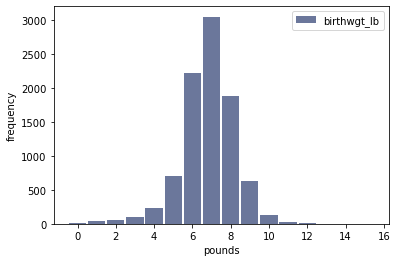

<Figure size 576x432 with 0 Axes>

In [121]:
# Q4.2: write your code below


live = nsfg_df[nsfg_df.outcome == 1]

hist = thinkstats2.Hist(live.birthwgt_lb, label = 'birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(ylabel = 'frequency', xlabel='pounds')